# Linear Regression

In [28]:
import pandas as pd

url = 'http://bit.ly/Test-PHN'
data=pd.read_csv(url)

data.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [29]:
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [30]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [31]:
cdf = data[['TV', 'sales']]
cdf.head(9)

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8


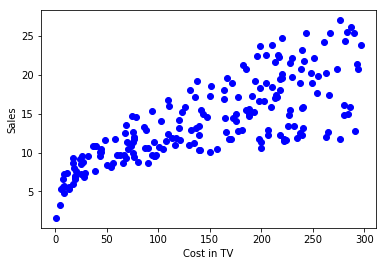

In [32]:
import matplotlib.pyplot as plt
plt.scatter(cdf.TV, cdf.sales,  color='blue')
plt.xlabel("Cost in TV")
plt.ylabel("Sales")
plt.show()

In [0]:
import numpy as np
msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]
#print(train)

In [36]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['TV']])
train_y = np.asanyarray(train[['sales']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.04678045]]
Intercept:  [7.10187837]


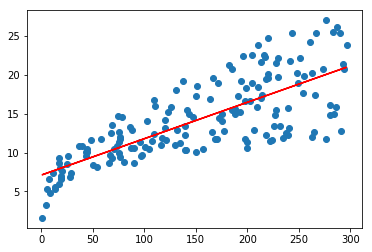

In [45]:
def fx(x):
  return regr.coef_*x + regr.intercept_

plt.scatter(train_x,train_y)
plt.plot(train_x,fx(train_x), color='red')
plt.show()

In [46]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['TV']])
test_y = np.asanyarray(test[['sales']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 1.99
R2-score: 0.55


# Non-Linear Regression




## Kuadratik

In [56]:

import pandas as pd

url = 'http://bit.ly/Test-PHN2'
dataK=pd.read_csv(url)

dataK.head(9)

,Unnamed: 0,x,ydata
0,0,-5.0,22.254233
1,1,-4.9,21.335109
2,2,-4.8,22.799538
3,3,-4.7,20.265303
4,4,-4.6,22.706364
5,5,-4.5,25.442385
6,6,-4.4,22.551061
7,7,-4.3,18.089280
8,8,-4.2,16.515683


In [53]:
data.tail(9)

,Unnamed: 0,x,ydata
91,91,4.1,15.003024
92,92,4.2,17.621731
93,93,4.3,19.729709
94,94,4.4,18.025966
95,95,4.5,18.368049
96,96,4.6,18.028788
97,97,4.7,19.907812
98,98,4.8,23.130505
99,99,4.9,25.025013


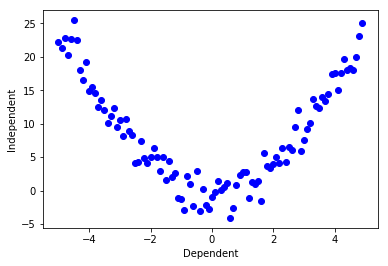

In [58]:
import matplotlib.pyplot as plt
plt.scatter(dataK.x, dataK.ydata,  color='blue')
plt.xlabel("Dependent")
plt.ylabel("Independent")
plt.show()

Untuk Data yang terbrntuk dalam polinomial seperti di atas maka dapat digunakan hampiran polinomial berikut ini

$P_n(x)=a_n x^n + a_{n-1} x^{n-1} + \cdots + a_0$

## Eksponensial

Plot terlebih dahulu data yang ada

In [59]:

import pandas as pd

url = 'http://bit.ly/Test-PHN3'
dataE=pd.read_csv(url)

dataE.head(9)

,Unnamed: 0,x,ydata
0,0,0.0,-2075.713065
1,1,0.1,395.826088
2,2,0.2,1951.395921
3,3,0.3,1330.135371
4,4,0.4,1622.862863
5,5,0.5,-2245.262371
6,6,0.6,1709.303727
7,7,0.7,1630.505779
8,8,0.8,-1176.215836


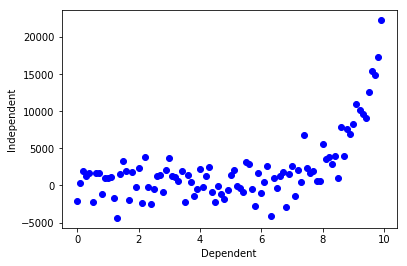

In [61]:
import matplotlib.pyplot as plt
plt.scatter(dataE.x, dataE.ydata,  color='blue')
plt.xlabel("Dependent")
plt.ylabel("Independent")
plt.show()

Untuk menghampiri data seperti apda gambar di atas, maka kana digunakan hampiran eksponensial,

$y(x)=be^{ax}$

Dengan menggunakan Least Square method maka didapatkan,

$E(a,b)= \displaystyle\sum_{i=1}^m | y_i - \displaystyle be^{ax_i}|^2$.

Selanjutnya untuk meminimumkan error, maka turunan parsial dihitung menjadi

$\displaystyle \frac{\partial E}{\partial a}=2\displaystyle\sum_{i=1}^m ( y_i - \displaystyle be^{ax_i}) (-bx_ie^{ax_i})$

dan

$\displaystyle \frac{\partial E}{\partial b}=2\displaystyle\sum_{i=1}^m ( y_i - \displaystyle be^{ax_i}) (-e^{ax_i})$

Note that: Dari dua persamaan terakhir ini tidak ada solusi eksak yang dapat dicari sehingga tidak bisa diselesaikan. 

Olehkarenanya dengan ide lain yakni dengan mengubah  $y(x)=be^{ax}$ kedalam logaritma menjadi

$ \ln y = \ln b + ax$,

Sehingga solusinya menjadi Linear kembali